In [1]:
# imports and matplotlib inline setup
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats
from scipy.stats import norm
import seaborn as sns

#  Homework 2

## APMTH 207: Stochastic Methods for Data Analysis, Inference and Optimization

**Due Date: ** Thursday, Febrary 9th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Monte Carlo Integration

Let $X$ be a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Let $h$ be the following function of $X$:

$$
h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}
$$

Compute $\mathbb{E}[h(X)]$ via Monte Carlo simulation using the following sampling methods:
- inverse transform sampling
- rejection sampling with both uniform proposal distribution and normal proposal distribution (steroids) (with appropriately chosen parameters)
- importance sampling with both uniform proposal distribution and normal proposal distribution (with appropriately chosen parameters)

# Finding the CDF and ICDF of fx(x)

I start by integrating the provided piecewise probability density function (pdf) to get the cumulative distribution function (cdf):

$$ 
f_X(x) = \begin{cases} 
\frac{1}{12}(x-1), &1\leq x\leq 3\\ 
-\frac{1}{12}(x-5), &3< x\leq 5\\ 
\frac{1}{6}(x-5), &5< x\leq 7\\ 
-\frac{1}{6}(x-9), &7< x\leq 9\\ 
0, &otherwise 
\end{cases} 
$$ 
 
$$ 
F_X(x) = \begin{cases} 
\int_1^x \frac{1}{12}(x-1)dx, &1\leq x\leq 3\\ 
\int_1^3 \frac{1}{12}(x-1)dx + \int_3^x -\frac{1}{12}(x-5) dx, &3< x\leq 5\\ 
\int_1^3 \frac{1}{12}(x-1)dx + \int_3^5 -\frac{1}{12}(x-5) dx + \int_5^x \frac{1}{6}(x-5) dx , &5< x\leq 7\\ 
\int_1^3 \frac{1}{12}(x-1)dx + \int_3^5 -\frac{1}{12}(x-5) dx + \int_5^7 \frac{1}{6}(x-5) dx + \int_7^x -\frac{1}{6}(x-9) dx, &7< x\leq 9\\ 
\end{cases} 
$$ 
 
Since the inverse cumulative distribution function (ICDF) is needed, I define $ F_X(x) = a $ and calculate it:

$$ 
InvF_X(x) = \begin{cases} 
\pm \sqrt(24a) +1 , & 1\leq x\leq 3, & 0 \le F_X(x) \le \frac{1}{6}\\ 
\pm \sqrt(24(\frac{1}{3} - a)) +5 , & 3\leq x\leq 5, &\frac{1}{6} \le F_X(x) \le \frac{1}{3}\\ 
\pm \sqrt(12(a - \frac{1}{3})) +5 , & 5\leq x\leq 7, &\frac{1}{3} \le F_X(x) \le \frac{2}{3}\\ 
\pm \sqrt(12(1-a) +9 , & 7\leq x\leq 9, &\frac{2}{3} \le F_X(x) \le 1\\ 
\end{cases} 
$$

I calculated the expectation of h(x) with the provided density function of X by applying the "Law of the Unconscious Statistician."

$$
\mathbb{E}[h(X)] = \int_{-\infty}^{+\infty} h(x)f(x) dx 
$$

To compute this expectation, samples can be drawn from $f_X(x)$ in each of the 4 regions of the piecewise function. 

The expectation can be approximated by an average given by:

$$E_{f}[\hat{h}]=\frac{1}{N}\sum_{x_i ∼ f(x)}h(x_i)$$

I will use the various sampling methods to draw from $f_X(x)$ in each of the 4 regions.








# Define f(x), F(x) (the cdf) and F_inv(x) (the inverse cdf)

In [2]:
# define the probabiliity distribution provided
p = lambda x: (1/12)*(x-1)*(1<=x)*(x<=3) + (-1/12)*(x-5)*(3<x)*(x<=5) + (1/6)*(x-5)*(5<x)*(x<=7) + (-1/6)*(x-9)*(7<x)*(x<=9)

# define the cumulative density function
CDF = lambda x: ((1/12)*((x**2)/2 - x +0.5)*(1<=x)*(x<=3) 
                 + ((-1/12)*((x**2)/2-5*x + 10.5) + (1/6))*(3<x)*(x<=5)  
                 + ((1/6)*((x**2)/2-5*x + 12.5) + (1/3))*(5<x)*(x<=7) 
                 + ((-1/6)*((x**2)/2-9*x + 38.5) + (2/3))*(7<x)*(x<=9))

# define the provided function, h, of X
Hx = lambda x: (1/(3*np.sqrt(2)*np.pi))*np.exp(-(1/18)*((x-5)**2))

# calculate the limits for the inverse of the cumulative density function
limit_1 = lambda x: (1/12)*((x**2)/2 - x + 0.5)

limit_2 = lambda x: (-1/12)*((x**2)/2-5*x + 8.5)

limit_3 = lambda x: (1/6)*((x**2)/2-5*x + 14.5)

limit_4 = lambda x: (-1/6)*((x**2)/2-9*x + 34.5)

# create a function to calculate the inverse of the cumulative density function
def invF(u):
    if ((0<=u) and (u<=(1/6))):
        return (1+np.sqrt(24*u))
    elif (((1/6)<=u) and (u<(1/3))):
        return (5-np.sqrt(8-24*u))
    elif (((1/3)<=u) and (u<(2/3))):
        return (5+ np.sqrt(12*u -4))
    elif (((2/3)<=u) and (u<1)):
        return (9 - np.sqrt(12 - 12*u))
    elif (u>=1):
        return 9
    else:
        return 0

# vectorize needed to be able to run over arrays
invF = np.vectorize(invF)

# Plot f(x), F(x) and the inverse of F(x)

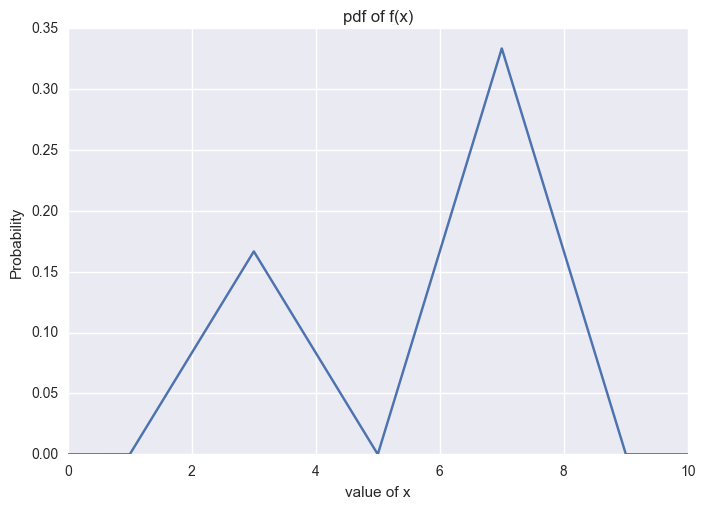

In [3]:
x = np.linspace(0, 10, 5000)
plt.plot(x, p(x))
plt.xlabel("value of x")
plt.ylabel("Probability")
plt.title("pdf of f(x)")
plt.show()

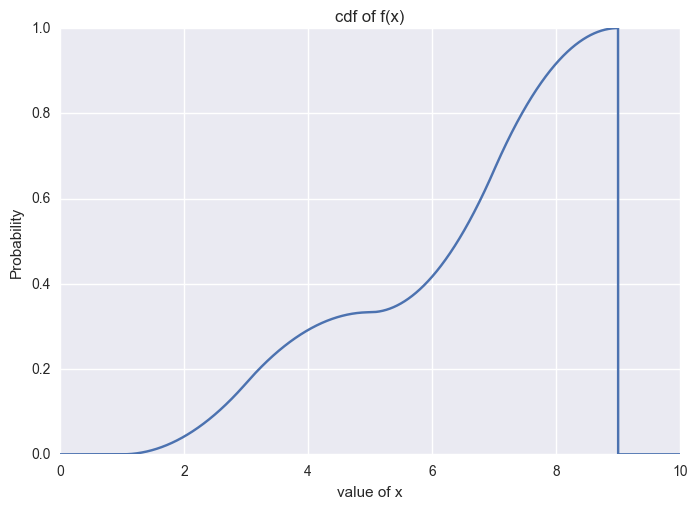

In [4]:
x = np.linspace(0, 10, 5000)
plt.plot(x, CDF(x))
plt.xlabel("value of x")
plt.ylabel("Probability")
plt.title("cdf of f(x)")
plt.show()

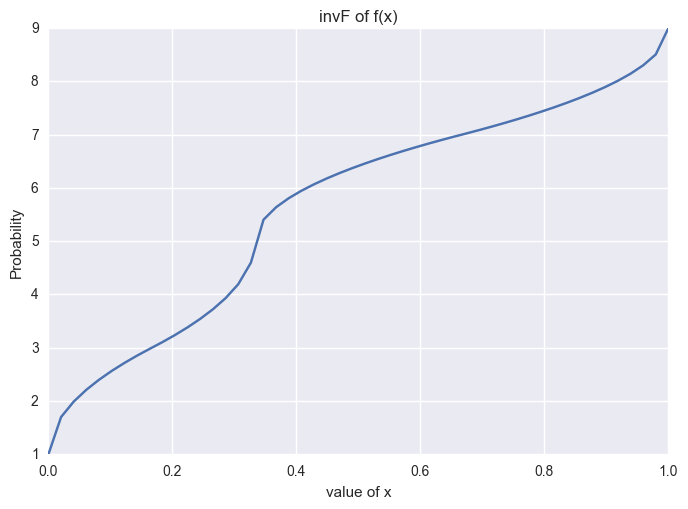

In [5]:
u = np.linspace(0,1)
plt.plot(u, invF(u))
plt.xlabel("value of x")
plt.ylabel("Probability")
plt.title("invF of f(x)")
plt.show()

**Using the Sampling Methods**

For each method, 1000 iterations (N) of the sampling process was carried out, each time drawing 10000 samples (M)

# Inverse Transform Sampling

In [6]:
# numpy array of 1000 zeros
sampInverse = np.zeros((1000,1))

# set up 1,000 iterations in which each will draw 10,000 samples 
for i in range(1000):
    # set the upper and lower domain limits and set the range limits based on them
    xmin = 1 
    xmax = 9 

    # set the range limits
    rmin = CDF(xmin)
    rmax = CDF(xmax)

    # the total number of samples to generate
    N = 10000 

    # generate uniform samples using the range limits
    R = np.random.uniform(rmin, rmax, N)
    
    # invert the cdf to get the samples from the target distribution
    X = invF(R)
    
    # get the mean from the calculation
    sampInverse[i] = np.mean(Hx(X))

print("Variance of the estimates: ", np.var(sampInverse))

Variance of the estimates:  1.09007606325e-08


# Display the results for Inverse Transform Sampling

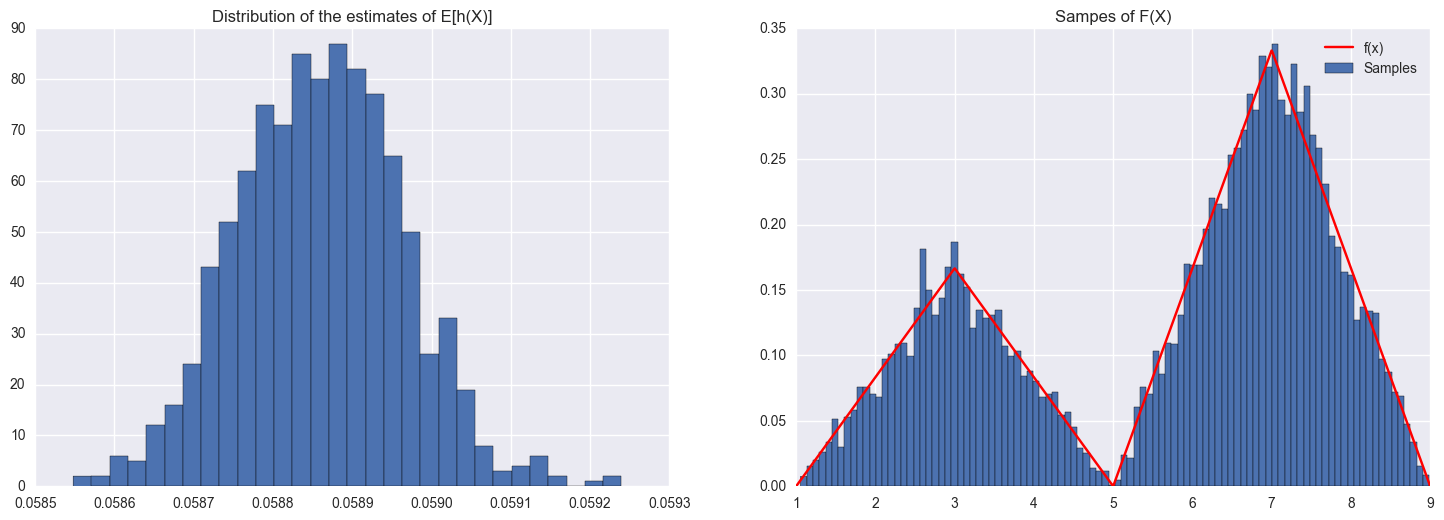

In [7]:
# plot the histogram of estimates 
plt.figure(figsize=(18,13))

# set subplots to side by side comparison 
plt.subplot(221)
plt.hist(sampInverse,bins=30, label=u'Samples');
plt.title('Distribution of the estimates of E[h(X)]')

# get the histogram info
hinfo = np.histogram(X,100)

# set subplots to side by side comparison
plt.subplot(222)

# plot the histogram
plt.hist(X,bins=100, label=u'Samples', normed=True);
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, p(xvals), 'r', label=u'f(x)')
plt.title('Sampes of F(X)')

# turn on the legend
plt.legend()

# Rejection Sampling: uniform proposal distribution

In [8]:
# numpy array of 1000 zeros
sampRejUniform = np.zeros((1000, 1))

# set the upper and lower domain limits and set the range limits based on them
xmin = 1 
xmax = 9 

for i in range(1000):
    # range limit (supremum) for y
    ymax = 1

    N = 10000 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):

        # pick a uniform number on [xmin, xmax) (e.g. 0...10)
        x = np.random.uniform(xmin, xmax)

        # pick a uniform number on [0, ymax)
        y = np.random.uniform(0,ymax)

        # Do the accept/reject comparison
        if y < p(x):
            samples[accepted] = x
            accepted += 1

        count +=1
    sampRejUniform[i] = np.mean(Hx(samples))
    
print("Count", count, "Accepted", accepted, "Ratio {0:.4f}".format(accepted/count))

Count 79397 Accepted 10000 Ratio 0.1259


# Display the results for Rejection Sampling: uniform proposal distribution

Variance of the estimates:  1.02352484577e-08


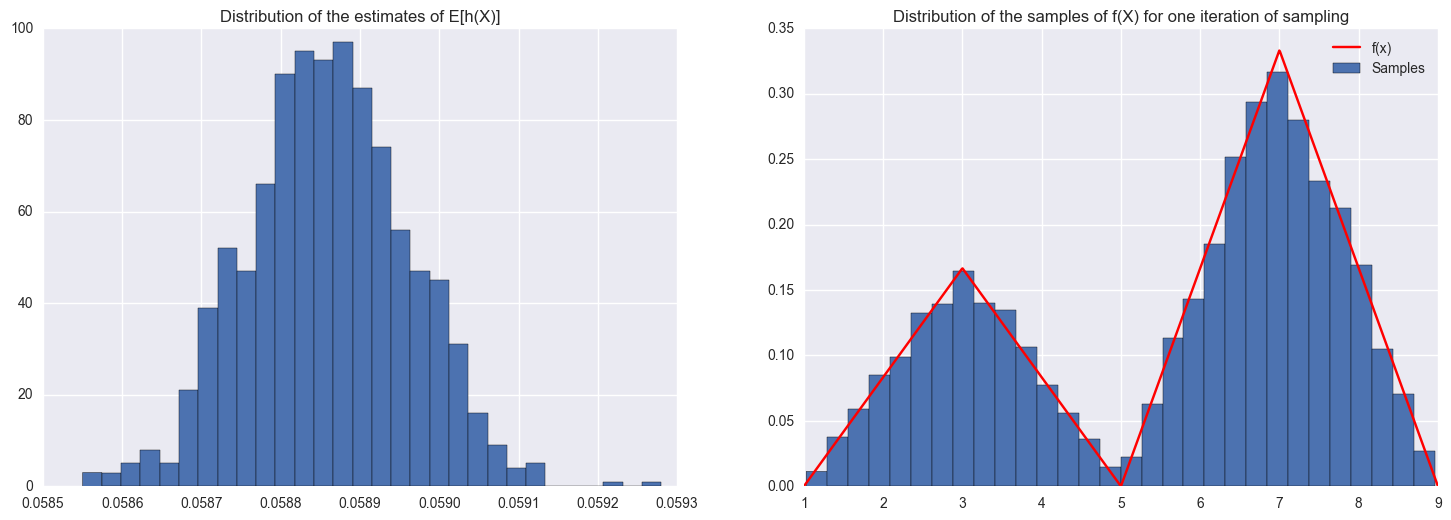

In [10]:
# plot the histogram of estimates 
plt.figure(figsize=(18,13))

# set subplots to side by side comparison
plt.subplot(221)

# Plot the histogram of the estimates
plt.hist(sampRejUniform, bins=30)
plt.title('Distribution of the estimates of E[h(X)]')

# Plot a histogram of the samples 

# set subplots to side by side comparison
plt.subplot(222)

# plot the histogram
hinfo = np.histogram(samples,30)
plt.hist(samples,bins=30, label=u'Samples', normed=True);
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, p(xvals), 'r', label=u'f(x)')
plt.title('Distribution of the samples of f(X) for one iteration of sampling')

# turn on the legend
plt.legend()

print("Variance of the estimates: ", np.var(sampRejUniform))

# Rejection Sampling: normal proposal distribution (steroids)

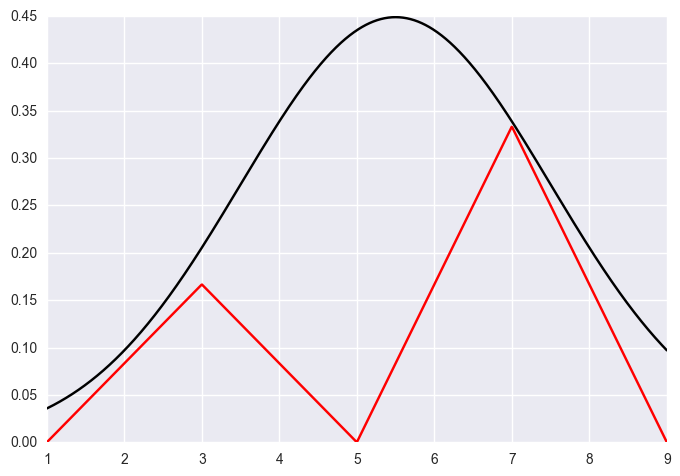

In [11]:
# Determine an appropriate normal sampling distribution
mu, sigma = 5.5, 2
M = 2.25
g = lambda x: M*(1/np.sqrt(2*math.pi*sigma**2))*np.exp(-((x-mu)**2)/(2*sigma**2))

# plot the (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, p(xvals), 'r', label=u'p(x)')
plt.plot(xvals, g(xvals), 'k', label=u'g(x)')

In [12]:
# numpy array of 1000 zeros
sampRejNormal = np.zeros((1000,1))

for i in range(1000):
    N = 10000 # the total of samples we wish to generate
    count = 0 # the total count of proposals
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)

    # generation loop
    while (accepted < N):

        # sample from the normal distribution
        xproposal = np.random.normal(mu,sigma)

        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)

        # Do the accept/reject comparison
        if y < p(xproposal)/(g(xproposal)):
            samples[accepted] = xproposal
            accepted += 1
        count +=1

    sampRejNormal[i] = np.mean(Hx(samples))

Count 22672 Accepted 10000 Ratio 0.4411
Variance of our estimates:  1.07495855834e-08


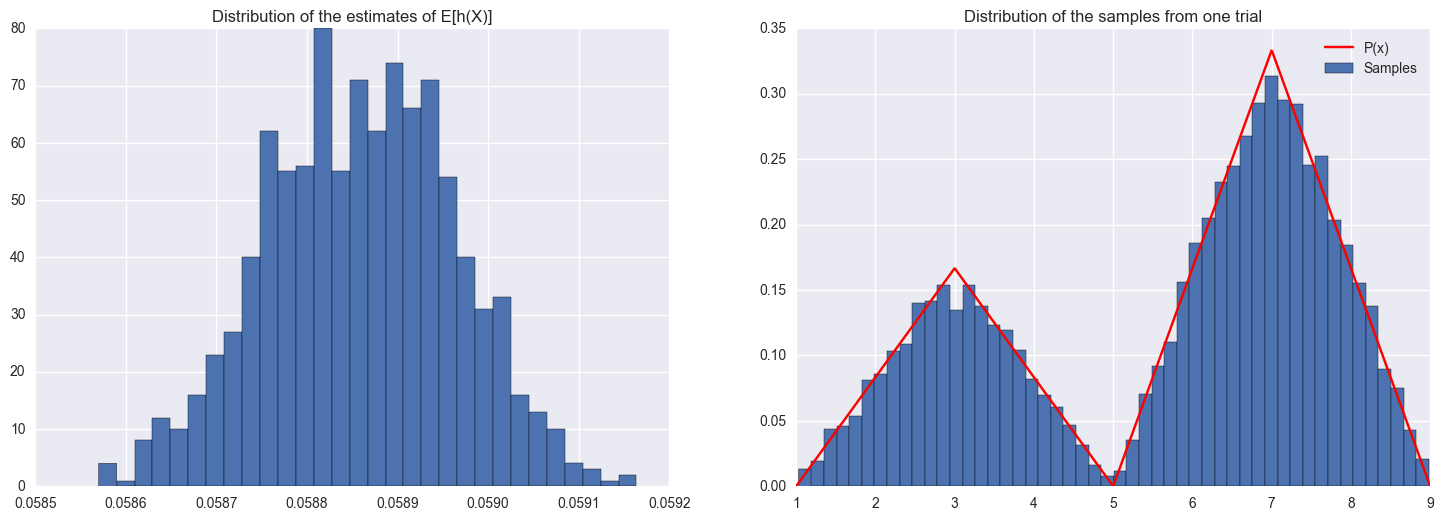

In [13]:
# plot the histogram of estimates 
plt.figure(figsize=(18,13))

# set subplots to side by side comparison
plt.subplot(221)

# plot histogram of estimates:
plt.hist(sampRejNormal, bins=30)
plt.title('Distribution of the estimates of E[h(X)]')

# set subplots to side by side comparison
plt.subplot(222)

# plot histogram of the samples
hinfo = np.histogram(samples,50)
plt.hist(samples,bins=50, label=u'Samples', normed=True);
plt.plot(xvals, p(xvals), 'r', label=u'P(x)')
plt.title('Distribution of the samples from one trial')
plt.legend()
   
print("Count", count, "Accepted", accepted, "Ratio {0:.4f}".format(accepted/count))
print("Variance of our estimates: ", np.var(sampRejNormal))

# Importance sampling: uniform proposal distribution

In [14]:
# numpy array of 1000 zeros
sampImpUniform = np.zeros((1000, 1))

# domain limits
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

for i in range(1000):
    N = 10000 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)

    # generation loop
    for j in range(N):
        samples[j] = np.random.uniform(xmin, xmax)

    sampImpUniform[i] = np.mean((p(samples)*(xmax-xmin))*Hx(samples));
    
print("Variance of our estimates: ", np.var(sampImpUniform))

Variance of our estimates:  1.83447867675e-07


# Importance sampling: normal proposal distribution (with appropriately chosen parameters)

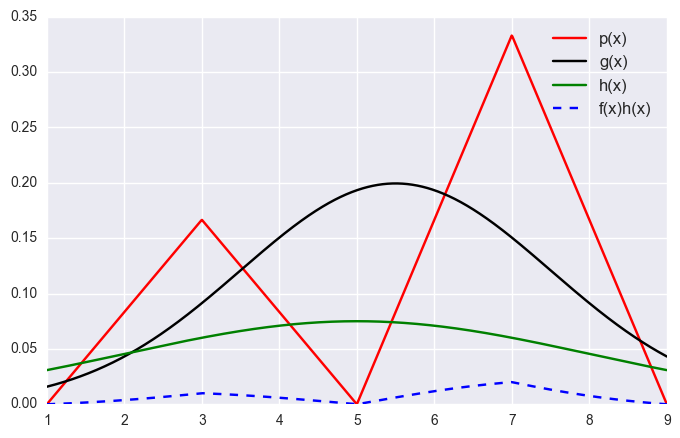

In [15]:
# set up the proposal distribution
xmin = 1
xmax = 9
mu = 5.5;
sig = 2;

# sampling distribution
g = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))

# plot our (normalized) function
plt.figure(figsize=(8,5))
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, p(xvals), 'r', label=u'p(x)')
plt.plot(xvals, g(xvals), 'k', label=u'g(x)')
plt.plot(xvals, Hx(xvals), 'g', label=u'h(x)')
plt.plot(xvals, p(xvals)*Hx(xvals), 'b--', label=u'f(x)h(x)')
plt.legend(fontsize=12)

In [16]:
N = 10000 # the total of samples we wish to generate

# a function for normalization
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

# numpy array of 1000 zeros
sampImpNormal = np.zeros(1000)

# normalization for gaussian from 1-9
normal = normfun(9)- normfun(1) 

for i in range(1000):
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    # generation loop
    while (accepted < N):
        # sample from sampling distribution 
        xis = np.random.normal(mu, sig)
        if (xis <= xmax) and (xis >= xmin):
            samples[accepted] = xis
            accepted += 1     
    sampImpNormal[i] = np.mean((p(samples)/g(samples))*Hx(samples))*normal;

print("Variance of our estimates: ", np.var(sampImpNormal))

Variance of our estimates:  1.3713643894e-07


In [17]:
table = [("Inverse transform sampling", sampInverse),
         ("Uniform rejection sampling", sampRejUniform),
         ("Normal rejection sampling", sampRejNormal),
         ("Import sampling via uniform dist",sampImpUniform),
         ("Import sampling via normal dist",sampImpNormal)]

print(" Estimates ".center(50,"="))
print("E(H(f(x))".rjust(50))
for r in table:
    title, x_vals = r
    
    print("{0:<40} {1:.5f} ".format(title, np.mean(x_vals))) 

=================== Estimates ====================
                                         E(H(f(x))
Inverse transform sampling               0.05886 
Uniform rejection sampling               0.05886 
Normal rejection sampling                0.05886 
Import sampling via uniform dist         0.05885 
Import sampling via normal dist          0.05885 


## Problem 2: Variance Reduction

### Part A

Compute the variance of each estimate of $\mathbb{E}[h(X)]$ obtained in Problem 1. Based on the discussion on sampling methods in lecture, which sampling methods, proposal distributions is expected, in principle, to resulted in lower variances? How well do your results align with these expectations?

### Part B (Stratified Sampling)

Often, a complex integral can be computed with more ease if one can break up the domain of the integral into pieces and if on each piece of the domain the integral is simplified. 

- Find a natural way to divide the domain of $X$ and express $\mathbb{E}[h(X)]$ as an ***correctly*** weighted sum of integrals over the pieces of the domain of $X$. (This constitutes the essentials of Stratified Sampling)

- Estimate each integral in the summand using rejection sampling using a normal proposal distribution (with sensibly chosen parameters). From these, estimate $\mathbb{E}[h(X)]$.

- Compute the variance of your estimate of $\mathbb{E}[h(X)]$. Compare with the variance of your previous estimate of $\mathbb{E}[h(X)]$ (in Part A, using rejection sampling, a normal proposal distribution over the entire domain of $X$).

Read more about Stratified Sampling:

1. [Variance Reduction Techniques Slides](http://www.sta.nus.edu.sg/~zhangjt/teaching/ST4231/lectures/chapter4.pdf)

2. [Monte Carlo Methods](http://www.public.iastate.edu/~mervyn/stat580/Notes/s09mc.pdf)

3. [Variance Reduction Techniques Chapter](http://sas.uwaterloo.ca/~dlmcleis/s906/chapt4.pdf)

# Part A - Comparison of sampling methods

In [27]:
table = [("Inverse transform sampling", sampInverse),
         ("Uniform rejection sampling", sampRejUniform),
         ("Normal rejection sampling", sampRejNormal),
         ("Import. sampling via uniform dist",sampImpUniform),
         ("Import. sampling via normal dist",sampImpNormal)]

print("Comparison of Variance ".center(50,"="))
for r in table:
    title, x_vals = r
    print("{0:<40} {1:.15f} ".format(title, np.var(x_vals)))

=============Comparison of Variance ==============
Inverse transform sampling               0.000000010900761 
Uniform rejection sampling               0.000000010235248 
Normal rejection sampling                0.000000010749586 
Import. sampling via uniform dist        0.000000183447868 
Import. sampling via normal dist         0.000000137136439 


(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.]),
 <a list of 7 Text yticklabel objects>)

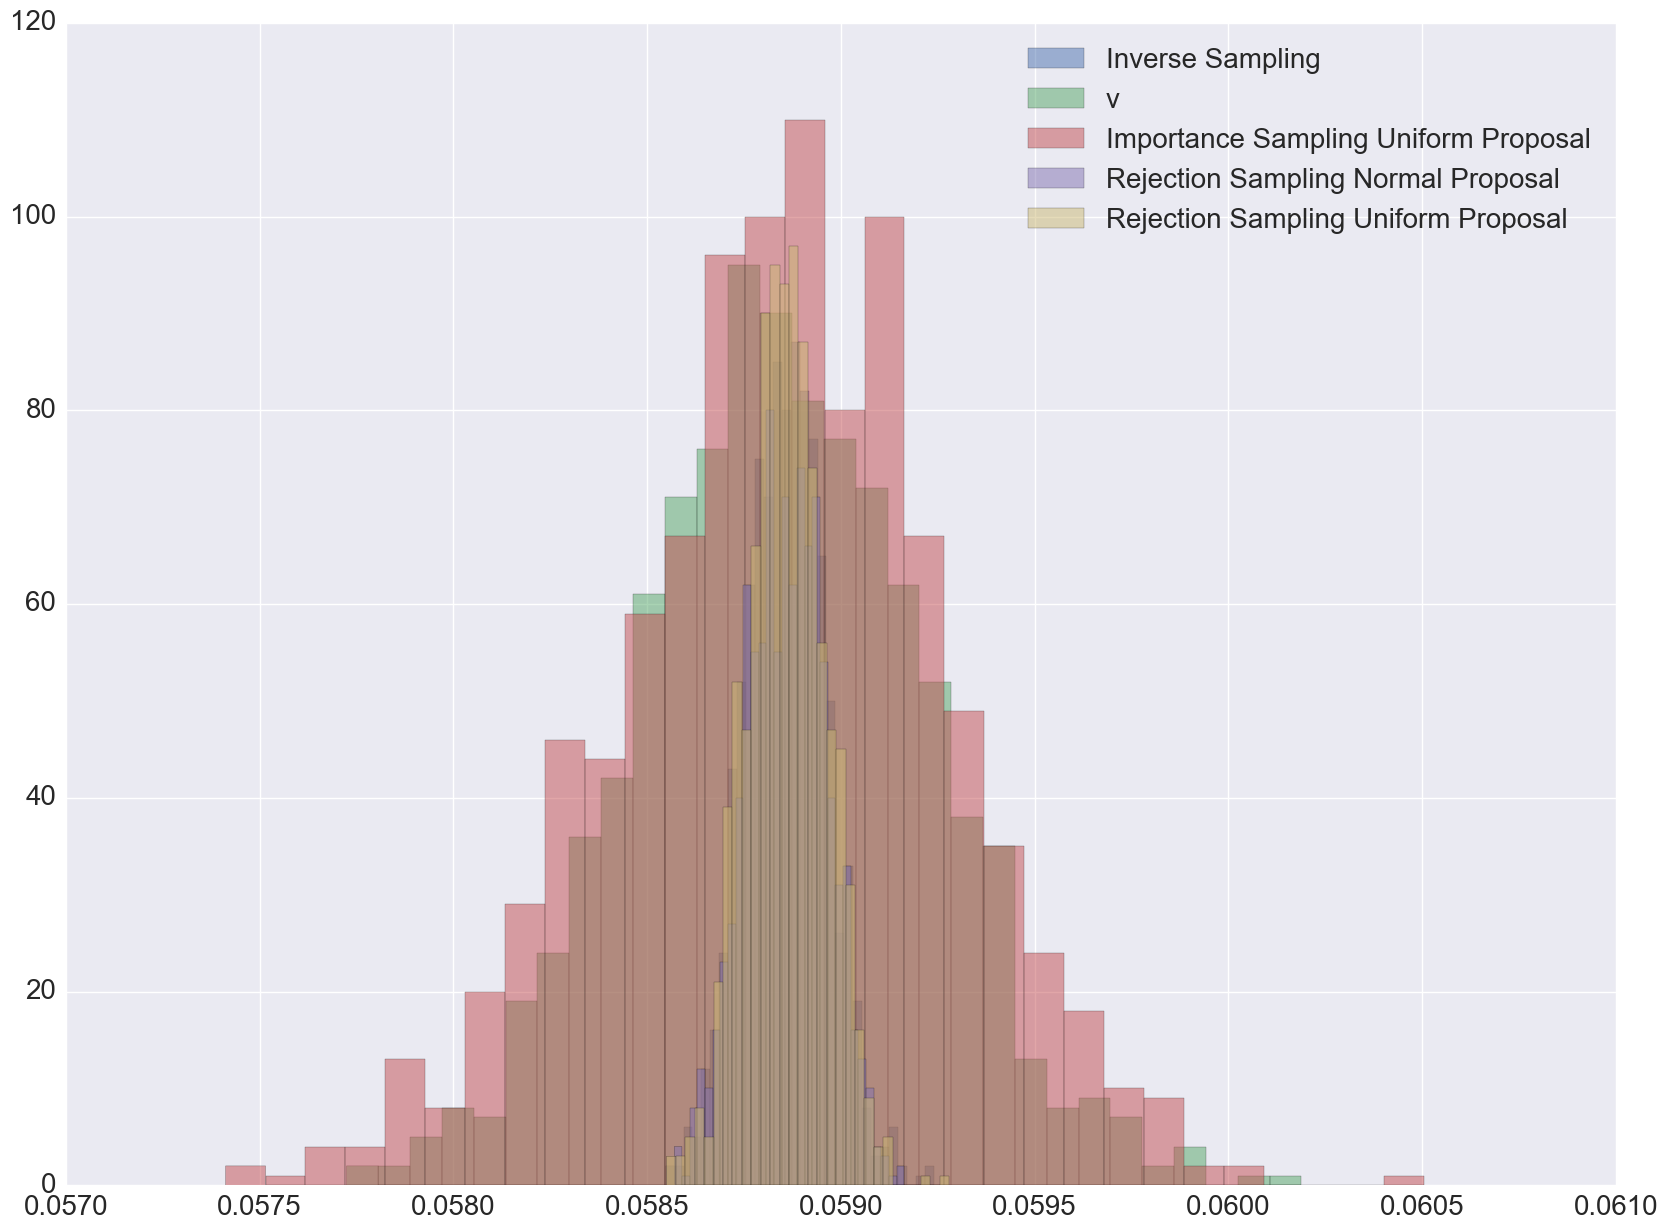

In [28]:
plt.figure(figsize=(20,15))
plt.hist(sampInverse,bins=30, alpha = 0.5, label='Inverse Sampling');
plt.hist(sampImpNormal,bins=30,alpha = 0.5, label='v');
plt.hist(sampImpUniform,bins=30, alpha = 0.5,label='Importance Sampling Uniform Proposal');
plt.hist(sampRejNormal, bins=30, alpha = 0.5, label='Rejection Sampling Normal Proposal');
plt.hist(sampRejUniform,bins=30, alpha = 0.5,label='Rejection Sampling Uniform Proposal');
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

I expected importance sampling to provide the lower variance compared to inverse sampling and rejection sampling but this is dependent on the proposal distribution. If the proposal distribution  g(x)g(x)  is selected such that the term  f(x)/g(x)f(x)/g(x)  has lower variability than  f(x)f(x) , then importance sampling will result in a better estimate. In this problem, rejection sampling with normal proposal distribution resulted in the lowest variance in the estimates. This might be due to the usage of a multiplier M in order to adjust the curve to fit better.

# Part B - Stratified Sampling

The pdf of f(x) can be split into two regions, section 1 spanning the domain $ 1 \le x \le 5$ and section 2 spanning the domain $ 5 \le x \le 9$ . For each section a separate proposal distribution $g_1(x)$ and $g_2(x)$ can be used to sample $x$. 
 
$$ E[H(x)] = f(E[h(x_1)], E[h(x_2)]) $$ 
$$ E[H(x)] = \int_1^5 f(x)h(x) dx + \int_5^9 f(x)h(x) dx $$ 
 
In order to express the sum of integrals as a sum of expectations, $f(x)$ needs to be normaliased in each of the strata - a normalised pdf is required to calculate an expectation value. 
 
Normalising $f(x)$ in each stratum involves diviing $f(x)$ by the area under the pdf in that stratum. The expectation therefore becomes a weighting sum of the expectations in each of the two strata. 
 
$$ E[H(x)] = w_1\int_1^5 \frac{f(x)}{w_1}h(x) dx + w_2\int_5^9 \frac{f(x)}{w_2}h(x) dx $$ 
 
where: 
 
$$ E[H(x_1)] = \int_1^5 \frac{f(x)}{w_1}h(x) dx $$ 
 
$$ E[H(x_2)] = \int_5^9 \frac{f(x)}{w_2}h(x) dx $$ 
 
Therefore the final expectation can be written as: 

$$ E[H(x)] = w_1*E[h(x_1)] + w_2*E[h(x_2)] $$

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45]),
 <a list of 10 Text yticklabel objects>)

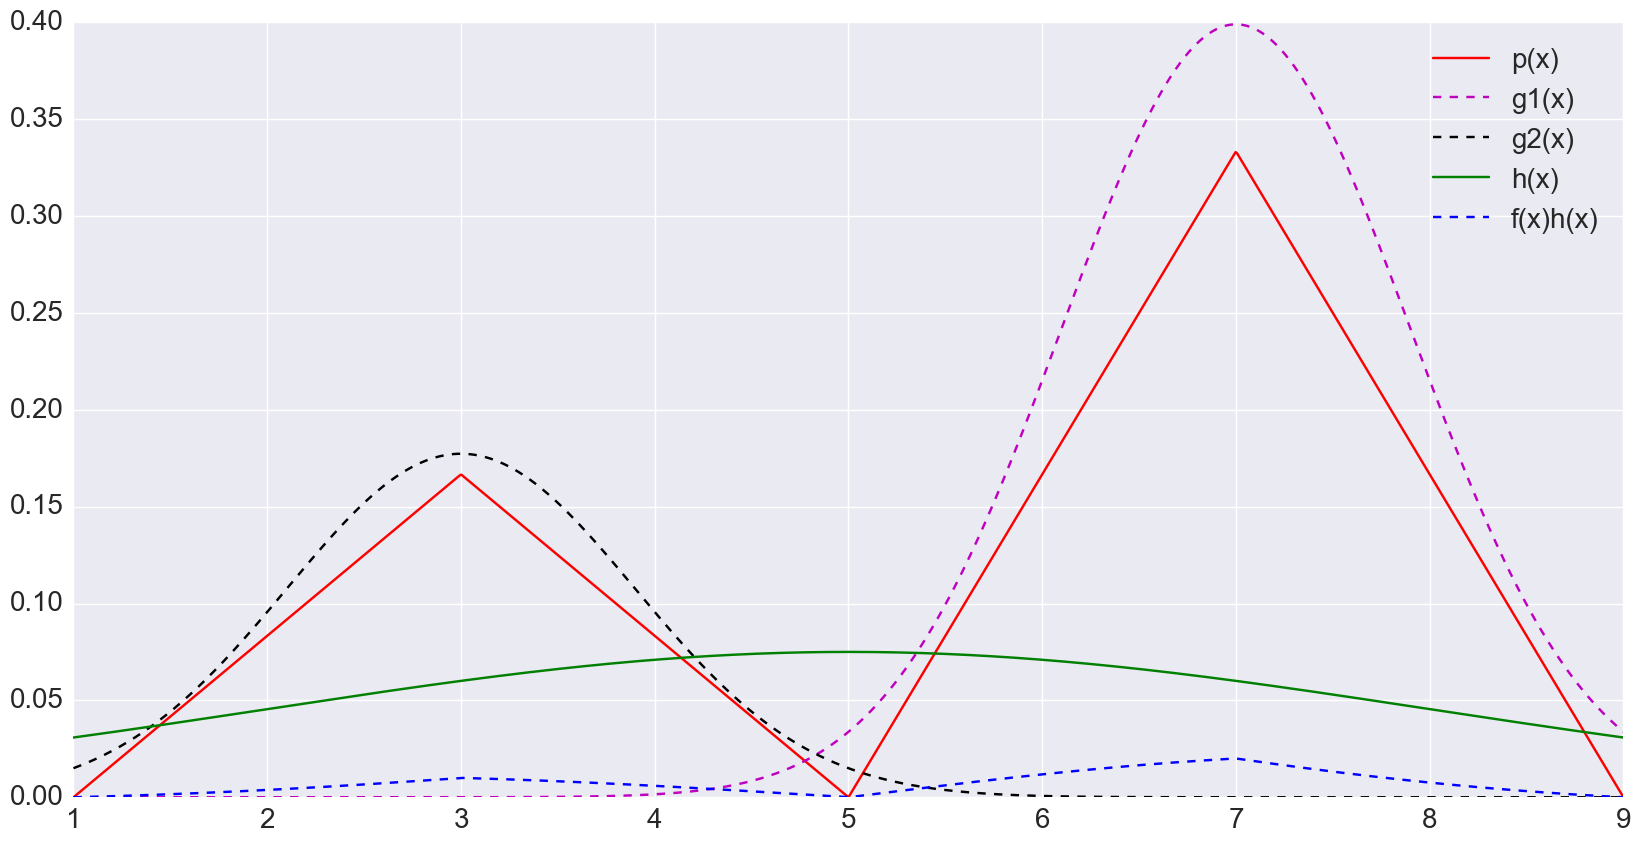

In [29]:
# set the upper and lower domain limits
xmin = 1
xmax = 9

# set the first sampling distribution
g1 = lambda x: (1/np.sqrt(2*np.pi*sig1**2))*np.exp(-(x-mu1)**2/(2.0*sig1**2))*M1
mu1, sig1, M1 = 7, 0.9, 0.9

# set the second sampling distribution
g2 = lambda x: (1/np.sqrt(2*np.pi*sig2**2))*np.exp(-(x-mu2)**2/(2.0*sig2**2))*M2
mu2, sig2, M2 = 3, 0.9, 0.4

# plot the (normalized) function
plt.figure(figsize=(20,10))
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, p(xvals), 'r', label=u'p(x)')
plt.plot(xvals, g1(xvals), 'm--', label=u'g1(x)')
plt.plot(xvals, g2(xvals), 'k--', label=u'g2(x)')
plt.plot(xvals, Hx(xvals), 'g', label=u'h(x)')
plt.plot(xvals, p(xvals)*Hx(xvals), 'b--', label=u'f(x)h(x)')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [30]:
M = 1000
sampStratified = np.zeros((M,1))

N = 10000 # the total of samples to generate

w1 = CDF(5)
w2 = CDF(9) - CDF(5)

for i in range(M):
    accepted1 = 0 # the number of accepted samples
    samples1 = np.zeros(N)
    count1 = 0
    accepted2 = 0 # the number of accepted samples
    samples2 = np.zeros(N)
    count2 = 0
    # section x domain 1-5
    while (accepted1 < N):
        # sample from the normal distribution
        xproposal = np.random.normal(mu2,sig2)
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)

        # Do the accept/reject comparison
        if (y < p(xproposal)/(g2(xproposal))) and (xproposal<=5) and (xproposal>=1):
            samples1[accepted1] = xproposal
            accepted1 += 1
        count1 += 1
    # section x domain 5-9
    while (accepted2 < N):
        # sample from the normal distribution
        xproposal = np.random.normal(mu1,sig1)

        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)

        # Do the accept/reject comparison
        if (y < p(xproposal)/(g1(xproposal)))  and (xproposal<=9) and (xproposal>5):
            samples2[accepted2] = xproposal
            accepted2 += 1
        count2 += 1
    sampStratified[i] = w1*np.mean(Hx(samples1)) + w2*np.mean(Hx(samples2))

/Users/jarvis/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Variance of the estimates:  6.26800478093e-09


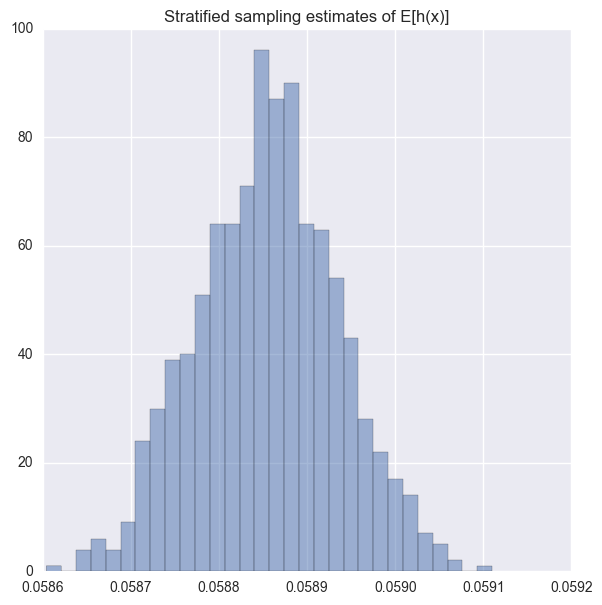

In [31]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.hist(sampStratified,30,alpha=0.5)
plt.title('Stratified sampling estimates of E[h(x)]')
plt.legend()
print("Variance of the estimates: ", np.var(sampStratified))

(array([   0.,   20.,   40.,   60.,   80.,  100.,  120.]),
 <a list of 7 Text yticklabel objects>)

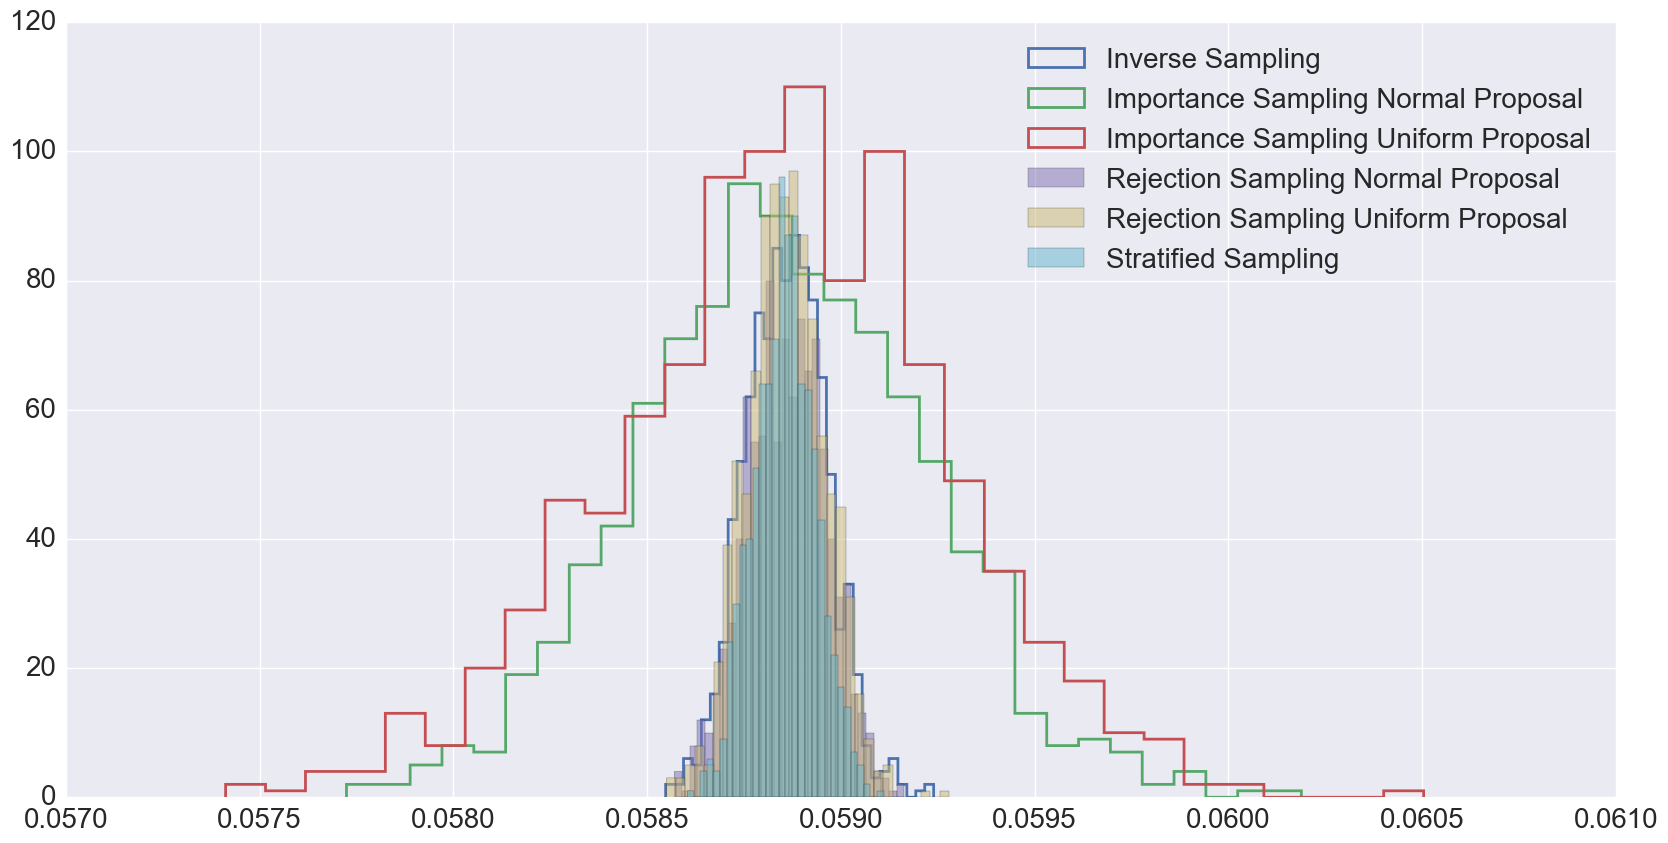

In [32]:
plt.figure(figsize=(20,10))
plt.hist(sampInverse,bins=30, histtype='step', linewidth=2, label='Inverse Sampling');
plt.hist(sampImpNormal,bins=30,histtype='step',linewidth=2, label='Importance Sampling Normal Proposal');
plt.hist(sampImpUniform,bins=30, histtype='step',linewidth=2,label='Importance Sampling Uniform Proposal');
plt.hist(sampRejNormal, bins=30, alpha = 0.5, label='Rejection Sampling Normal Proposal');
plt.hist(sampRejUniform,bins=30, alpha = 0.5,label='Rejection Sampling Uniform Proposal');
plt.hist(sampStratified,30,alpha=0.5, label='Stratified Sampling')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

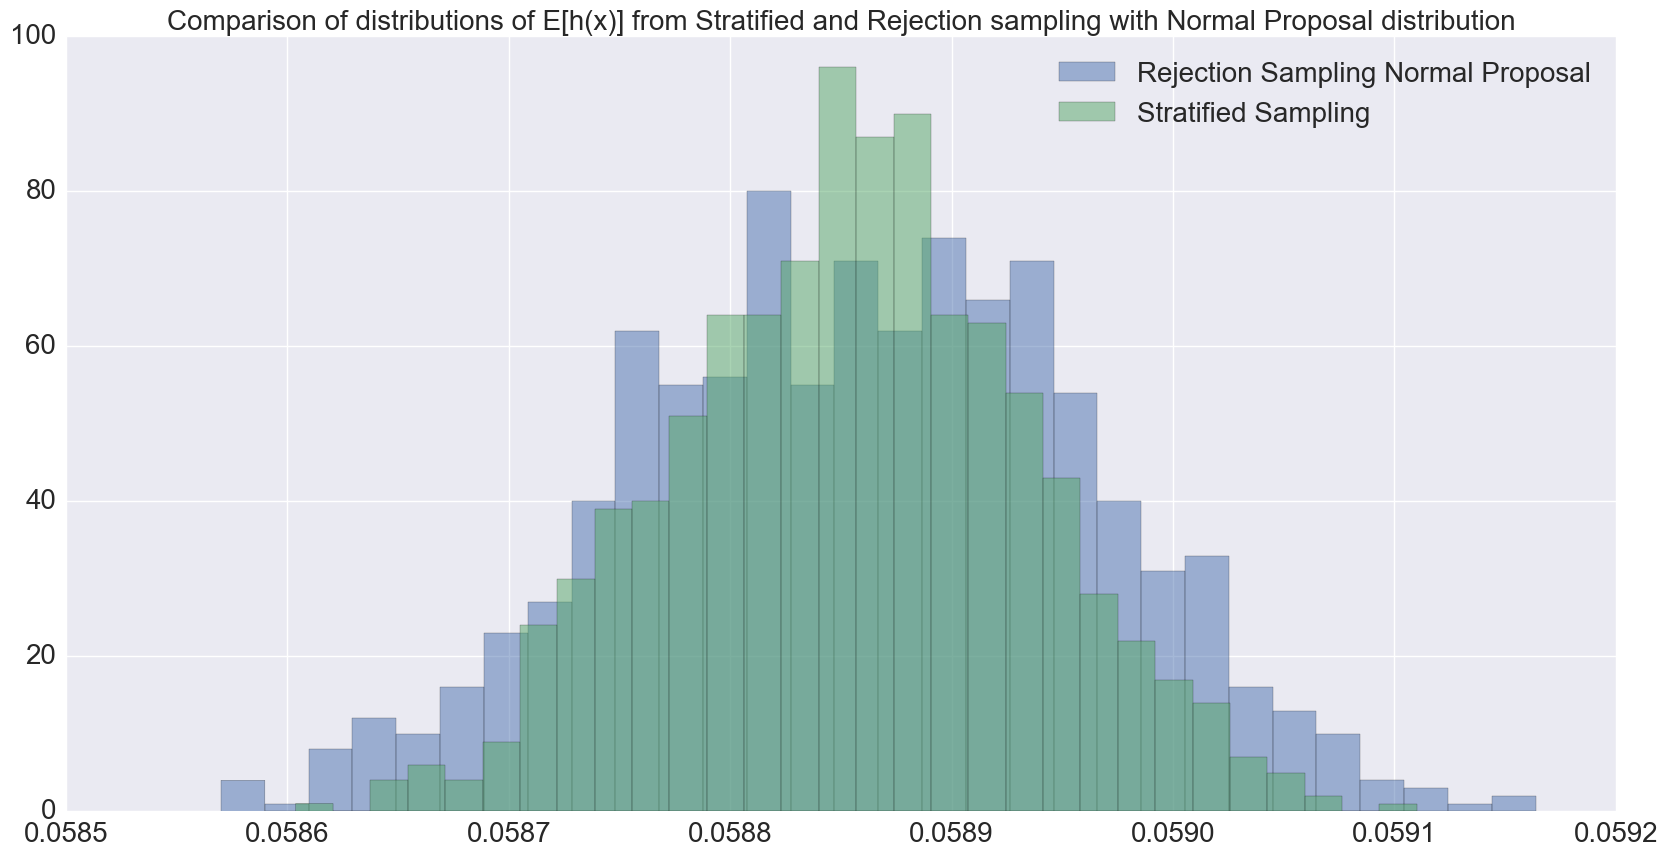

In [33]:
plt.figure(figsize=(20,10))
plt.hist(sampRejNormal, bins=30, alpha = 0.5, label='Rejection Sampling Normal Proposal');
plt.hist(sampStratified,30,alpha=0.5, label='Stratified Sampling')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Comparison of distributions of E[h(x)] from Stratified and Rejection sampling with Normal Proposal distribution', fontsize=20)

In [34]:
table = [("Inverse transform sampling", sampInverse),
         ("Uniform rejection sampling", sampRejUniform),
         ("Normal rejection sampling", sampRejNormal),
         ("Import. sampling via uniform dist",sampImpUniform),
         ("Import. sampling via normal dist",sampImpNormal),
         ("Stratified Sampling via normal proposal", sampStratified)]

print("Comparison of Variance ".center(50,"="))
for r in table:
    title, x_vals = r
    print("{0:<40} {1:.15f} ".format(title, np.var(x_vals))) 

=============Comparison of Variance ==============
Inverse transform sampling               0.000000010900761 
Uniform rejection sampling               0.000000010235248 
Normal rejection sampling                0.000000010749586 
Import. sampling via uniform dist        0.000000183447868 
Import. sampling via normal dist         0.000000137136439 
Stratified Sampling via normal proposal  0.000000006268005 


Compared to Rejection Sampling Method Using Normal Distribution, Stratified Sampling method has a lower variance, meaning that by partitioning the pdf into smaller areas to draw samplings and weighing them, we are able to draw a much closer approximation than using the rejection sampling method.